In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
#KNN
#IterativeImputer
%matplotlib inline

In [ ]:
data17 = pd.read_csv("/content/drive/MyDrive/oreeva/2017.csv")
data18 = pd.read_csv("/content/drive/MyDrive/oreeva/2018.csv")

In [ ]:
merge_data = pd.concat([data17, data18])

In [ ]:
data17.head()

,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
0,{5CF9903C-EF46-7F13-E053-6C04A8C074B1},2017-06-22,F,86787,Y,B,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NG19 8RX,MANSFIELD,PICCADILLY CLOSE,NaN,24,53.177751,-1.191828,NG19 8,130.419369,741.0,735.0,674.0,102877980,3.658300
1,{5F54B81D-F9BF-2B45-E053-6B04A8C01FB0},2017-10-13,F,805000,N,A,D,NaN,NaN,9.0,173.04,E,D,House,Detached,297.0,189.0,1489.0,259.0,NaN,Normal,0.0,Partial double glazing,Average,"Cavity wall, as built, insulated (assumed)",Good,"Pitched, insulated (assumed)",Average,2.7,SN8 3LP,WILTSHIRE,FOREST HILL,NaN,3,51.380891,-1.605473,SN8 3,446.805795,10.0,633.0,NaN,97804281,27.205352
2,{4C4EE000-1146-1854-E050-A8C063054F34},2017-03-08,F,275000,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DY5 3XJ,DUDLEY,PATTERDALE WAY,NaN,36,52.469943,-2.134401,DY5 3,310.743404,1576.0,845.0,745.0,101429204,5.659612
3,{5F54B81D-EAA3-2B45-E053-6B04A8C01FB0},2017-10-27,L,220000,N,A,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B93 8SP,SOLIHULL,KINGSLAND DRIVE,NaN,63,52.377534,-1.762286,B93 8,265.388640,184.0,817.0,686.0,100150188,4.190032
4,{5CF9903C-2479-7F13-E053-6C04A8C074B1},2017-05-05,F,237000,N,A,D,NaN,NaN,NaN,105.00,B,A,House,Detached,95.0,67.0,320.0,87.0,NaN,NaN,NaN,High performance glazing,Very Good,Average thermal transmittance 0.24 W/m²K,Very Good,Average thermal transmittance 0.14 W/m²K,Very Good,NaN,LE10 2PG,BLABY,RUBY CLOSE,NaN,1,52.531956,-1.376669,LE10 2,236.354546,643.0,582.0,761.0,93361793,14.267637


In [ ]:
data17.describe()

,price,number_of_rooms,total_floor_area,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_number_open_fireplaces,epc_floor_height,latitude,longitude,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
count,9.922120e+05,488846.000000,550761.000000,550761.000000,550761.000000,550761.000000,550761.000000,46374.000000,490416.000000,308738.000000,981289.000000,981289.000000,970311.000000,981030.000000,929846.000000,907947.000000,9.922120e+05,981289.000000
mean,3.430209e+05,4.607099,91.285681,932.934124,80.054866,718.063476,142.841696,3.207465,0.200783,2.452155,52.340786,-1.353508,311.753490,2371.478555,485.204683,964.415709,9.772327e+07,6.210879
std,2.057961e+06,1.765542,54.153310,4616.730188,40.891643,552.759957,76.631545,2.540377,0.561604,0.640488,1.141627,1.329082,475.290107,2943.331264,432.445959,793.564470,4.938171e+06,7.306605
min,1.000000e+00,1.000000,0.000000,-1323.000000,-8.000000,-65.000000,-31.000000,0.000000,0.000000,0.000000,49.913207,-6.352647,0.532170,0.000000,0.000000,3.000000,8.857598e+07,0.003302
25%,1.400000e+05,3.000000,64.000000,196.000000,55.000000,401.000000,96.000000,2.000000,0.000000,2.330000,51.455900,-2.240896,96.812114,446.000000,243.000000,412.000000,9.336849e+07,1.791768
50%,2.248145e+05,4.000000,81.500000,262.000000,73.000000,606.000000,117.000000,3.000000,0.000000,2.400000,52.143151,-1.387420,161.098046,1430.000000,383.000000,712.000000,9.830963e+07,3.749439
75%,3.500000e+05,5.000000,105.300000,348.000000,96.000000,872.000000,164.000000,4.000000,0.000000,2.500000,53.364162,-0.258715,295.766537,3048.000000,576.000000,1241.000000,1.021145e+08,7.717438
max,7.075042e+08,90.000000,5327.890000,358454.000000,6760.000000,48391.000000,1395.000000,55.000000,50.000000,230.000000,55.797415,1.757928,4784.667983,23074.000000,4695.000000,4838.000000,1.056134e+08,83.744964


In [ ]:
data17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992212 entries, 0 to 992211
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   transaction_id                  992212 non-null  object 
 1   created                         992212 non-null  object 
 2   duration                        992212 non-null  object 
 3   price                           992212 non-null  int64  
 4   old_new                         992212 non-null  object 
 5   ppd_category                    992212 non-null  object 
 6   property_type                   992212 non-null  object 
 7   flat                            95590 non-null   object 
 8   floor_level                     113197 non-null  object 
 9   number_of_rooms                 488846 non-null  float64
 10  total_floor_area                550761 non-null  float64
 11  epc_current_energy_rating       550761 non-null  object 
 12  epc_potential_en

In [ ]:
data17.columns

Index(['transaction_id', 'created', 'duration', 'price', 'old_new',
       'ppd_category', 'property_type', 'flat', 'floor_level',
       'number_of_rooms', 'total_floor_area', 'epc_current_energy_rating',
       'epc_potential_energy_rating', 'epc_property_type', 'epc_built_form',
       'epc_energy_consumption_current', 'epc_lighting_cost_current',
       'epc_heating_cost_current', 'epc_hot_water_cost_current',
       'epc_flat_storey_count', 'epc_glazed_area',
       'epc_number_open_fireplaces', 'epc_windows_description',
       'epc_windows_energy_eff', 'epc_walls_description',
       'epc_walls_energy_eff', 'epc_roof_description', 'epc_roof_energy_eff',
       'epc_floor_height', 'postcode', 'city', 'street', 'building_name',
       'building_number', 'latitude', 'longitude', 'postcode_sector',
       'closeststop', 'crimesin3km_antisocial', 'closestschool', 'closestpark',
       'address_id', 'distance_center'],
      dtype='object')

In [ ]:
# sns.pairplot(data17)

In [ ]:
co = pd.DataFrame((data17.corr())['price'].sort_values(ascending=False))
print(co)

                                   price
price                           1.000000
total_floor_area                0.103011
epc_lighting_cost_current       0.078283
crimesin3km_antisocial          0.069967
number_of_rooms                 0.067995
epc_heating_cost_current        0.066814
epc_flat_storey_count           0.059270
longitude                       0.039182
epc_number_open_fireplaces      0.037144
address_id                      0.025247
epc_floor_height                0.024482
epc_hot_water_cost_current      0.016348
closestschool                   0.013863
epc_energy_consumption_current  0.006752
closeststop                    -0.001172
closestpark                    -0.005499
distance_center                -0.015240
latitude                       -0.047006


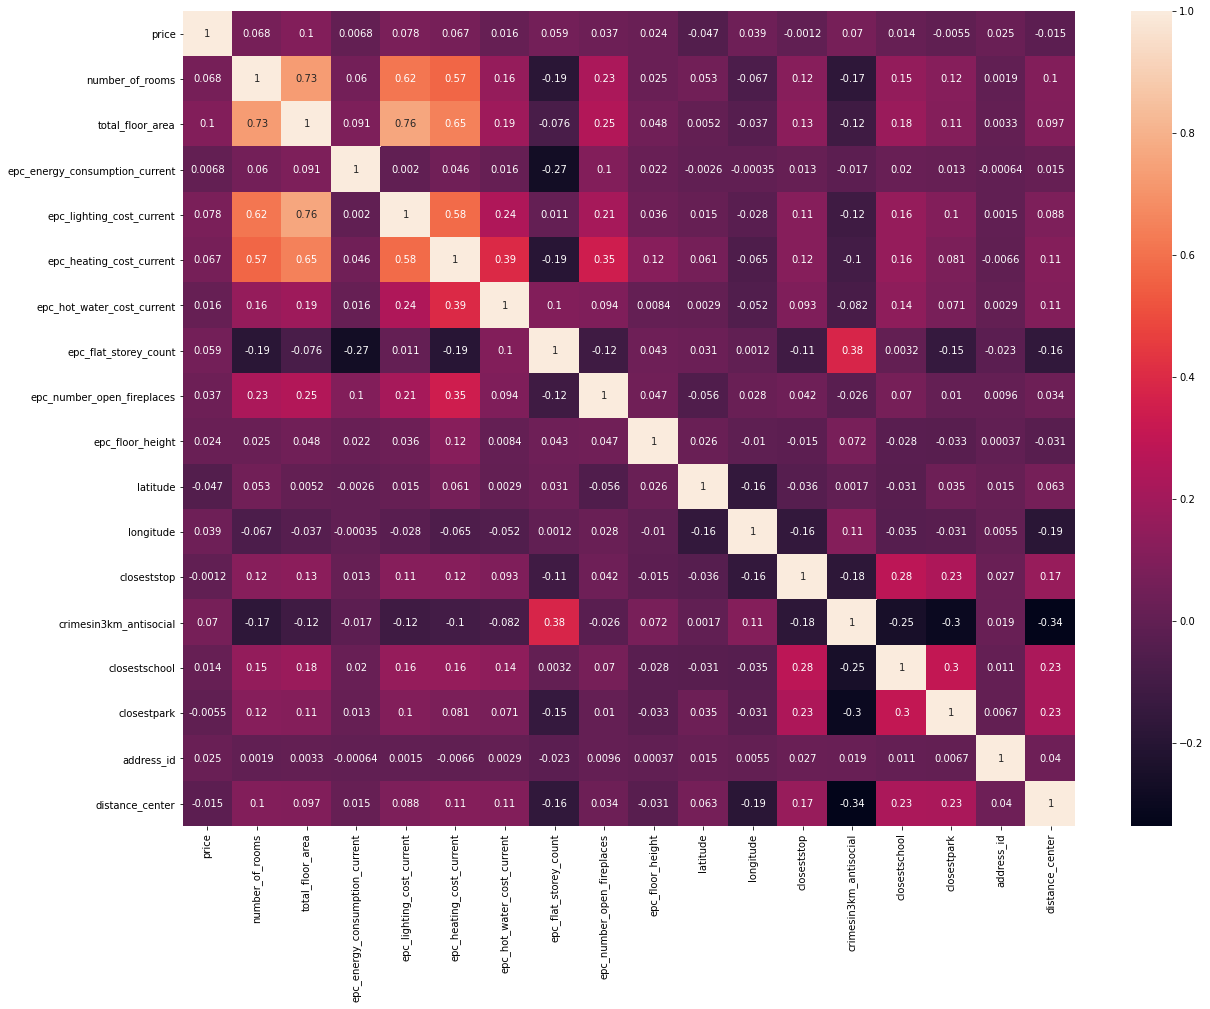

In [ ]:
plt.subplots(figsize=(20, 15))
#sns.heatmap(data17.corr())
sns.heatmap(data17.corr(), annot=True)

In [ ]:
data17['price'].describe()

count    9.922120e+05
mean     3.430209e+05
std      2.057961e+06
min      1.000000e+00
25%      1.400000e+05
50%      2.248145e+05
75%      3.500000e+05
max      7.075042e+08
Name: price, dtype: float64

In [ ]:
#sns.displot(data17['price'])

In [ ]:
y=data17['price']
from sklearn import preprocessing
y2= preprocessing.normalize([y])
y2

array([[4.17604292e-05, 3.87352317e-04, 1.32325326e-04, ...,
        3.89758232e-05, 2.11720521e-04, 1.07784992e-04]])

In [ ]:
sns.histplot(y2) #session crashes after using all av

In [ ]:
data17['city'].describe()

count         992198
unique           350
top       BIRMINGHAM
freq           14409
Name: city, dtype: object

In [ ]:
data17['building_name'].describe()

count     152228
unique     58974
top         UNIT
freq        2340
Name: building_name, dtype: object

In [ ]:
data17['building_number'].describe()

count     896394
unique      5938
top            1
freq       31870
Name: building_number, dtype: object

In [ ]:
data17['city'].head()

0    MANSFIELD
1    WILTSHIRE
2       DUDLEY
3     SOLIHULL
4        BLABY
Name: city, dtype: object

Text(0.5, 1.0, 'Price vs Closest Park')

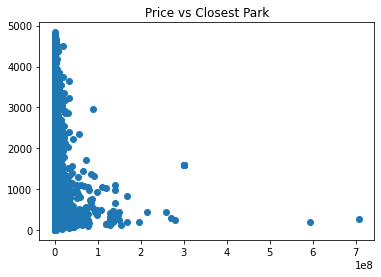

In [ ]:
plt.scatter(data17.price, data17.closestpark) #(x, y)
#plt.scatter(data17.price, data17.closestschool, color='orange')
plt.title("Price vs Closest Park")

Text(0.5, 1.0, 'Price vs Closest School')

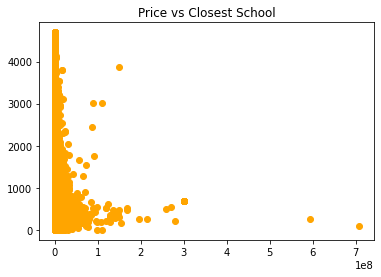

In [ ]:
plt.scatter(data17.price, data17.closestschool, color='orange')
#plt.scatter(data18.price, data18.closestschool, color='red')
plt.title("Price vs Closest School")

Text(0.5, 1.0, 'Price vs Closest Stop')

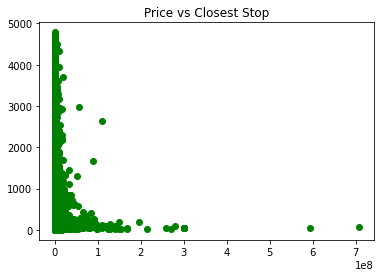

In [ ]:
plt.scatter(data17.price, data17.closeststop, color='green')
plt.title("Price vs Closest Stop")

Text(0.5, 1.0, 'Price vs Crime in 3km')

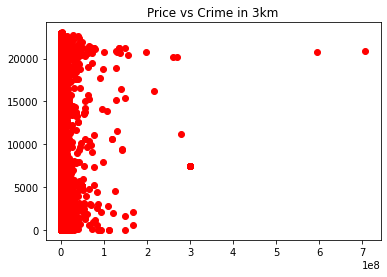

In [ ]:
plt.scatter(data17.price, data17.crimesin3km_antisocial, color='red')
plt.title("Price vs Crime in 3km")

Text(0.5, 1.0, 'Closest Park vs Crime in 3km')

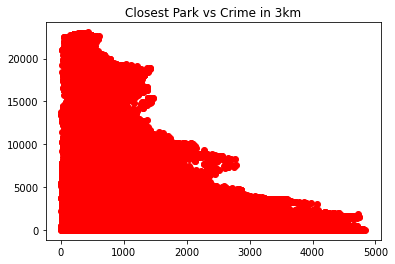

In [ ]:
plt.scatter(data17.closestpark, data17.crimesin3km_antisocial, color='red')
plt.title("Closest Park vs Crime in 3km")

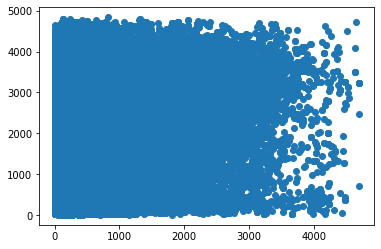

In [ ]:
plt.scatter(data17.closestschool, data17.closestpark)

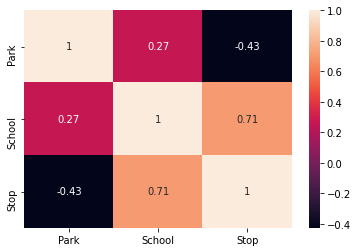

In [ ]:
data = {'Park': [745, 686, 761, 619, 1035],
        'School': [845, 817, 582, 128, 606],
        'Stop': [310, 265, 236, 90, 55]
        }

df = pd.DataFrame(data,columns=['Park','School','Stop'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## **-----Checkpoint-----**

In [ ]:
print(data17.isnull().sum())

NameError: ignored

In [ ]:
print(data18.isnull().sum())

NameError: ignored

In [ ]:
print(merge_data.isnull().sum())

In [ ]:
print(data17.shape)

In [ ]:
print(data18.shape)

In [ ]:
print(merge_data.shape)

In [ ]:
sns.heatmap(data17.isnull(),yticklabels=False,cbar=False)
plt.show()

In [ ]:
sns.heatmap(merge_data.isnull(),yticklabels=False,cbar=False)
plt.show()

In [ ]:
plt.subplots(figsize=(20, 15))
#sns.heatmap(data17.corr())
sns.heatmap(merge_data.corr(), annot=True)

In [ ]:
merge_data['price'].describe()

In [ ]:
merge_data['price'].hist(bins = 50)

In [ ]:
merge_data.boxplot(column='price')

In [ ]:
merge_data.boxplot(column='price', by = 'old_new')

In [ ]:
merge_data.boxplot(column = 'price', by = 'property_type')

In [ ]:
merge_data.boxplot(column = 'price', by = 'duration')

In [ ]:
#Create new features from date of transfer by splitting it to year, month and day
def date(data):
    try:
        year, month, day = data.split('-')
        return year, month, day
    except:
        np.nan, np.nan, np.nan

merge_data['Year'], merge_data['Month'], merge_data['Day'] = zip(*merge_data['created'].apply(date))

In [ ]:
#Getting each column into the right data type
def convert_int(data):
  data = data.astype(int)
  return data

merge_data[['Year', 'Month','Day']] = merge_data[['Year', 'Month','Day']].apply(convert_int)

In [ ]:
merge_data.dtypes

In [ ]:
merge_data.groupby('Year')['price'].mean().plot.bar()

In [ ]:
merge_data.groupby('Month')['price'].mean().plot.bar()

In [ ]:
temp = merge_data.groupby(['Year','Month'])['price'].mean()
temp.plot(figsize=(16,5), title = 'UK Housing Price(Monthwise)', fontsize = 12)

In [ ]:
temp3 = pd.crosstab(merge_data['old_new'], merge_data['price'])
temp3.plot(kind='bar', stacked=True, grid=False) 

# **---------------------------------------**

In [ ]:
merge_data.head(5)

,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
0,{5CF9903C-EF46-7F13-E053-6C04A8C074B1},2017-06-22,F,86787,Y,B,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NG19 8RX,MANSFIELD,PICCADILLY CLOSE,NaN,24,53.177751,-1.191828,NG19 8,130.419369,741.0,735.0,674.0,102877980,3.658300
1,{5F54B81D-F9BF-2B45-E053-6B04A8C01FB0},2017-10-13,F,805000,N,A,D,NaN,NaN,9.0,173.04,E,D,House,Detached,297.0,189.0,1489.0,259.0,NaN,Normal,0.0,Partial double glazing,Average,"Cavity wall, as built, insulated (assumed)",Good,"Pitched, insulated (assumed)",Average,2.7,SN8 3LP,WILTSHIRE,FOREST HILL,NaN,3,51.380891,-1.605473,SN8 3,446.805795,10.0,633.0,NaN,97804281,27.205352
2,{4C4EE000-1146-1854-E050-A8C063054F34},2017-03-08,F,275000,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DY5 3XJ,DUDLEY,PATTERDALE WAY,NaN,36,52.469943,-2.134401,DY5 3,310.743404,1576.0,845.0,745.0,101429204,5.659612
3,{5F54B81D-EAA3-2B45-E053-6B04A8C01FB0},2017-10-27,L,220000,N,A,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B93 8SP,SOLIHULL,KINGSLAND DRIVE,NaN,63,52.377534,-1.762286,B93 8,265.388640,184.0,817.0,686.0,100150188,4.190032
4,{5CF9903C-2479-7F13-E053-6C04A8C074B1},2017-05-05,F,237000,N,A,D,NaN,NaN,NaN,105.00,B,A,House,Detached,95.0,67.0,320.0,87.0,NaN,NaN,NaN,High performance glazing,Very Good,Average thermal transmittance 0.24 W/m²K,Very Good,Average thermal transmittance 0.14 W/m²K,Very Good,NaN,LE10 2PG,BLABY,RUBY CLOSE,NaN,1,52.531956,-1.376669,LE10 2,236.354546,643.0,582.0,761.0,93361793,14.267637


In [ ]:
merge_data.tail(5)

,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
986560,{75050A85-292A-9A88-E053-6B04A8C02390},2018-08-08,L,170000,N,A,T,NaN,NaN,5.0,86.90,E,C,House,Mid-Terrace,376.0,56.10401,642.2242,84.10469,NaN,Normal,0.0,Fully double glazed,Average,"Solid brick, as built, no insulation (assumed)...",NaN,"Pitched, 200 mm loft insulation + Chr(13) + Pi...",NaN,2.60,SO14 0BW,SOUTHAMPTON,NORTHBROOK ROAD,NaN,3,50.908753,-1.394705,SO14 0,89.857893,7662.0,121.0,580.0,97807812,0.825481
986561,{6B32222C-9CE1-01F1-E053-6C04A8C0D2C8},2018-03-29,F,235000,N,A,T,NaN,NaN,6.0,103.34,E,D,House,End-Terrace,430.0,103.00000,661.0000,304.00000,NaN,Normal,1.0,Fully double glazed,Average,"Cavity wall, filled cavity",Good,"Pitched, 100 mm loft insulation",Average,2.44,IP23 8HY,MID-SUFFOLK,BROADFIELDS CLOSE,NaN,14,52.303928,1.041101,IP23 8,109.514623,15.0,182.0,NaN,92918602,9.301852
986562,{7C2D0700-292D-4963-E053-6B04A8C07B97},2018-10-11,F,275000,N,A,D,NaN,NaN,8.0,134.00,D,C,House,Detached,271.0,129.00000,1079.0000,183.00000,NaN,Normal,0.0,Fully double glazed,Average,"Cavity wall, as built, insulated (assumed)",Good,"Pitched, 150 mm loft insulation",Good,NaN,DN35 9QN,NORTH-EAST-LINCOLNSHIRE,ELWYN PLACE,NaN,7,53.542945,-0.045089,DN35 9,80.931363,1347.0,161.0,856.0,91529444,3.660081
986563,{64342BFE-1139-422C-E053-6C04A8C0FB8A},2018-01-12,L,81000,N,A,F,NaN,1st,2.0,39.04,C,C,Flat,NaN,394.0,40.00000,220.0000,108.00000,NaN,Normal,0.0,Fully double glazed,Average,"Cavity wall, as built, insulated (assumed)",Good,(another dwelling above),NaN,2.31,TN33 0TZ,ROTHER,ST.MARTINS WAY,ABBEY COURT,23,50.916734,0.485545,TN33 0,125.846245,127.0,284.0,220.0,98714471,8.584327
986564,{7E86B6FA-B846-458C-E053-6B04A8C0C84C},2018-09-26,F,880000,N,A,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IG8 8GU,WALTHAM-FOREST,BRANDESBURY SQUARE,NaN,22,51.604394,0.070164,IG8 8,179.165522,1699.0,610.0,4361.0,101977493,6.223346


In [ ]:
merge_data[['transaction_id', 'price', 'property_type', 'old_new', 'duration', 'city']]

,transaction_id,price,property_type,old_new,duration,city
0,{5CF9903C-EF46-7F13-E053-6C04A8C074B1},86787,T,Y,F,MANSFIELD
1,{5F54B81D-F9BF-2B45-E053-6B04A8C01FB0},805000,D,N,F,WILTSHIRE
2,{4C4EE000-1146-1854-E050-A8C063054F34},275000,D,N,F,DUDLEY
3,{5F54B81D-EAA3-2B45-E053-6B04A8C01FB0},220000,T,N,L,SOLIHULL
4,{5CF9903C-2479-7F13-E053-6C04A8C074B1},237000,D,N,F,BLABY
...,...,...,...,...,...,...
986560,{75050A85-292A-9A88-E053-6B04A8C02390},170000,T,N,L,SOUTHAMPTON
986561,{6B32222C-9CE1-01F1-E053-6C04A8C0D2C8},235000,T,N,F,MID-SUFFOLK
986562,{7C2D0700-292D-4963-E053-6B04A8C07B97},275000,D,N,F,NORTH-EAST-LINCOLNSHIRE
986563,{64342BFE-1139-422C-E053-6C04A8C0FB8A},81000,F,N,L,ROTHER


In [ ]:
cities = pd.DataFrame(merge_data.city.value_counts())
cities.head()

,city
BIRMINGHAM,29598
LEEDS,27379
CORNWALL,23777
COUNTY-DURHAM,19268
CHESHIRE-EAST,17943


In [ ]:
merge_data[['city', 'latitude', 'longitude']]

,city,latitude,longitude
0,MANSFIELD,53.177751,-1.191828
1,WILTSHIRE,51.380891,-1.605473
2,DUDLEY,52.469943,-2.134401
3,SOLIHULL,52.377534,-1.762286
4,BLABY,52.531956,-1.376669
...,...,...,...
986560,SOUTHAMPTON,50.908753,-1.394705
986561,MID-SUFFOLK,52.303928,1.041101
986562,NORTH-EAST-LINCOLNSHIRE,53.542945,-0.045089
986563,ROTHER,50.916734,0.485545


In [ ]:
merge_data[merge_data['city'].isna()]

,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
85961,{5F54B81E-308F-2B45-E053-6B04A8C01FB0},2017-07-28,F,667000,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OX8 6HG,NaN,HIGH STREET,THE OLD SCHOOL,40,NaN,NaN,OX8 6,NaN,NaN,NaN,NaN,103260116,NaN
96521,{4C4EE000-5D3F-1854-E050-A8C063054F34},2017-02-28,F,1482560,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP9 1LB,NaN,SCARD STREET,NaN,9,NaN,NaN,NP9 1,NaN,NaN,NaN,NaN,103059260,NaN
297772,{582D0636-B563-8F22-E053-6C04A8C01BAC},2017-07-28,L,57500,N,A,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CF1 8LT,NaN,LOWER CATHEDRAL ROAD,NaN,64,NaN,NaN,CF1 8,NaN,NaN,NaN,NaN,100678183,NaN
358935,{50F18103-F400-9FD5-E050-A8C063054923},2017-05-09,F,560000,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CF1 7NJ,NaN,PENARTH ROAD,NaN,162,NaN,NaN,CF1 7,NaN,NaN,NaN,NaN,100678179,NaN
363025,{50F18103-F390-9FD5-E050-A8C063054923},2017-05-02,F,235000,N,B,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP2 1UY,NaN,GELLIHAF ROAD,TYNEWYDD,NaN,NaN,NaN,NP2 1,NaN,NaN,NaN,NaN,103040424,NaN
409465,{4C4EE000-39E9-1854-E050-A8C063054F34},2017-03-21,F,215000,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NP9 1LY,NaN,COMMERCIAL STREET,HORNBLOWER,126,NaN,NaN,NP9 1,NaN,NaN,NaN,NaN,103059261,NaN
472383,{61D8894E-956A-3DE6-E053-6C04A8C01207},2017-12-01,F,315000,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L46 0RY,NaN,ARROWE AVENUE,NaN,7,NaN,NaN,L46 0,NaN,NaN,NaN,NaN,102151747,NaN
515059,{5F54B81E-302F-2B45-E053-6B04A8C01FB0},2017-11-10,F,1015000,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YO2 4BB,NaN,HOLGATE ROAD,HOLGATE HILL HOTEL,124,NaN,NaN,YO2 4,NaN,NaN,NaN,NaN,105084614,NaN
608272,{5CF9903C-33B0-7F13-E053-6C04A8C074B1},2017-07-24,L,46500,N,A,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L44 6LB,NaN,POULTON ROAD,NaN,29,NaN,NaN,L44 6,NaN,NaN,NaN,NaN,102150872,NaN
627751,{5F54B81E-3AB4-2B45-E053-6B04A8C01FB0},2017-10-16,F,50000,N,B,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CF8 8RD,NaN,HIGH STREET,EMPORIUM BUILDINGS,41-41A,NaN,NaN,CF8 8,NaN,NaN,NaN,NaN,100754349,NaN


In [ ]:
merge_data[['transaction_id', 'created', 'price', 'property_type', 'old_new', 'duration', 'city', 'latitude','longitude']]

,transaction_id,created,price,property_type,old_new,duration,city,latitude,longitude
0,{5CF9903C-EF46-7F13-E053-6C04A8C074B1},2017-06-22,86787,T,Y,F,MANSFIELD,53.177751,-1.191828
1,{5F54B81D-F9BF-2B45-E053-6B04A8C01FB0},2017-10-13,805000,D,N,F,WILTSHIRE,51.380891,-1.605473
2,{4C4EE000-1146-1854-E050-A8C063054F34},2017-03-08,275000,D,N,F,DUDLEY,52.469943,-2.134401
3,{5F54B81D-EAA3-2B45-E053-6B04A8C01FB0},2017-10-27,220000,T,N,L,SOLIHULL,52.377534,-1.762286
4,{5CF9903C-2479-7F13-E053-6C04A8C074B1},2017-05-05,237000,D,N,F,BLABY,52.531956,-1.376669
...,...,...,...,...,...,...,...,...,...
986560,{75050A85-292A-9A88-E053-6B04A8C02390},2018-08-08,170000,T,N,L,SOUTHAMPTON,50.908753,-1.394705
986561,{6B32222C-9CE1-01F1-E053-6C04A8C0D2C8},2018-03-29,235000,T,N,F,MID-SUFFOLK,52.303928,1.041101
986562,{7C2D0700-292D-4963-E053-6B04A8C07B97},2018-10-11,275000,D,N,F,NORTH-EAST-LINCOLNSHIRE,53.542945,-0.045089
986563,{64342BFE-1139-422C-E053-6C04A8C0FB8A},2018-01-12,81000,F,N,L,ROTHER,50.916734,0.485545


In [ ]:
#Summary statistics for only categorical variables
merge_data.describe(include=['O']).transpose()

,count,unique,top,freq
transaction_id,1978777,1978777,{5376B385-BB61-34C1-E053-6B04A8C09FF6},1
created,1978777,728,2017-06-30,19604
duration,1978777,2,F,1502069
old_new,1978777,2,N,1768260
ppd_category,1978777,2,A,1701330
property_type,1978777,5,T,541990
flat,189742,3379,1,13630
floor_level,197545,26,1st,63262
epc_current_energy_rating,960356,8,D,392862
epc_potential_energy_rating,960356,8,C,378269


In [ ]:
print(merge_data[merge_data.price==1].shape[0])
merge_data[merge_data.price==1]

6


,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
418172,{5CF9903C-774E-7F13-E053-6C04A8C074B1},2017-07-19,L,1,N,A,F,2,2nd,2.0,50.61,D,C,Flat,Mid-Terrace,391.0,47.0,336.0,120.0,NaN,Normal,0.0,Single glazed,Very Poor,"Sandstone, as built, no insulation (assumed)",Very Poor,(another dwelling above),NaN,2.96,BA2 4DU,BATH-AND-NORTH-EAST-SOMERSET,EDWARD STREET,NaN,10,51.384478,-2.352430,BA2 4,36.772437,1969.0,648.0,232.0,89032127,0.604228
458871,{5F54B81D-A642-2B45-E053-6B04A8C01FB0},2017-10-25,L,1,N,A,F,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO9 1HH,HAVANT,PARK WAY,NaN,39A,50.852752,-0.986704,PO9 1,183.942822,2759.0,438.0,228.0,103485928,0.321527
458874,{5F54B81D-A641-2B45-E053-6B04A8C01FB0},2017-10-25,L,1,N,A,F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO9 1HH,HAVANT,PARK WAY,NaN,39A,50.852752,-0.986704,PO9 1,183.942822,2759.0,438.0,228.0,103485928,0.321527
708286,{55BDCAE6-19B7-521D-E053-6B04A8C0DD7A},2017-02-06,F,1,N,A,S,NaN,NaN,6.0,112.00,D,B,House,Semi-Detached,210.0,89.0,748.0,97.0,NaN,Normal,0.0,Fully double glazed,Average,"Cavity wall, as built, no insulation (assumed)",Poor,"Pitched, 100 mm loft insulation",Average,NaN,BB5 5TQ,HYNDBURN,LODGESIDE,NaN,30,53.778887,-2.387955,BB5 5,183.027739,2251.0,540.0,430.0,89141950,3.159753
580161,{80E1AA97-D7E3-7BF8-E053-6C04A8C00BF2},2018-10-03,L,1,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH7 6TG,FLINTSHIRE,MOLD ROAD,NaN,115,53.166700,-3.115267,CH7 6,1663.481582,726.0,NaN,145.0,105569191,1.808311
858285,{79A74E21-CF9E-1289-E053-6B04A8C01627},2018-07-12,L,1,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OL5 0JD,TAMESIDE,LUZLEY ROAD,CROSS FARM,NaN,53.513364,-2.050841,OL5 0,56.126457,2417.0,428.0,2324.0,105431009,4.027145


In [ ]:
merge_data['price'].describe()

count    1.978777e+06
mean     3.441981e+05
std      1.942431e+06
min      1.000000e+00
25%      1.440000e+05
50%      2.265000e+05
75%      3.520000e+05
max      7.075042e+08
Name: price, dtype: float64

In [ ]:
print(merge_data[merge_data.price==1].shape[0])
merge_data[merge_data.price==1]

6


,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
418172,{5CF9903C-774E-7F13-E053-6C04A8C074B1},2017-07-19,L,1,N,A,F,2,2nd,2.0,50.61,D,C,Flat,Mid-Terrace,391.0,47.0,336.0,120.0,NaN,Normal,0.0,Single glazed,Very Poor,"Sandstone, as built, no insulation (assumed)",Very Poor,(another dwelling above),NaN,2.96,BA2 4DU,BATH-AND-NORTH-EAST-SOMERSET,EDWARD STREET,NaN,10,51.384478,-2.352430,BA2 4,36.772437,1969.0,648.0,232.0,89032127,0.604228
458871,{5F54B81D-A642-2B45-E053-6B04A8C01FB0},2017-10-25,L,1,N,A,F,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO9 1HH,HAVANT,PARK WAY,NaN,39A,50.852752,-0.986704,PO9 1,183.942822,2759.0,438.0,228.0,103485928,0.321527
458874,{5F54B81D-A641-2B45-E053-6B04A8C01FB0},2017-10-25,L,1,N,A,F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO9 1HH,HAVANT,PARK WAY,NaN,39A,50.852752,-0.986704,PO9 1,183.942822,2759.0,438.0,228.0,103485928,0.321527
708286,{55BDCAE6-19B7-521D-E053-6B04A8C0DD7A},2017-02-06,F,1,N,A,S,NaN,NaN,6.0,112.00,D,B,House,Semi-Detached,210.0,89.0,748.0,97.0,NaN,Normal,0.0,Fully double glazed,Average,"Cavity wall, as built, no insulation (assumed)",Poor,"Pitched, 100 mm loft insulation",Average,NaN,BB5 5TQ,HYNDBURN,LODGESIDE,NaN,30,53.778887,-2.387955,BB5 5,183.027739,2251.0,540.0,430.0,89141950,3.159753
580161,{80E1AA97-D7E3-7BF8-E053-6C04A8C00BF2},2018-10-03,L,1,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH7 6TG,FLINTSHIRE,MOLD ROAD,NaN,115,53.166700,-3.115267,CH7 6,1663.481582,726.0,NaN,145.0,105569191,1.808311
858285,{79A74E21-CF9E-1289-E053-6B04A8C01627},2018-07-12,L,1,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OL5 0JD,TAMESIDE,LUZLEY ROAD,CROSS FARM,NaN,53.513364,-2.050841,OL5 0,56.126457,2417.0,428.0,2324.0,105431009,4.027145


## **-----Data Cleaning-----**

In [ ]:
#outliers = data point that differs significantly from other observations. 
#An outlier may be due to variability in the measurement or it may indicate experimental error

In [ ]:
#identifying outliers using interquartile rule
#whats the 1.5?
#what is interquartile?
Stats=merge_data.price.describe()
INTQ=Stats["75%"]-Stats["25%"]
UPPER_Q=Stats["75%"]+1.5*INTQ
LOWER_Q=Stats["75%"]-1.5*INTQ
print("The upper quartile of the house price is: ", UPPER_Q)
print("The lower quartile of the house price is: ", LOWER_Q)

The upper quartile of the house price is:  664000.0
The lower quartile of the house price is:  40000.0


In [ ]:
#Remove house detail with price less than £40000
#25794 houses sold have price fall below lower bound outlier
merge_data[merge_data.price < 40000].shape[0]

25794

In [ ]:
merge_data = merge_data.iloc[:,0:][merge_data.price > 40000]
merge_data.head()

,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
0,{5CF9903C-EF46-7F13-E053-6C04A8C074B1},2017-06-22,F,86787,Y,B,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NG19 8RX,MANSFIELD,PICCADILLY CLOSE,NaN,24,53.177751,-1.191828,NG19 8,130.419369,741.0,735.0,674.0,102877980,3.658300
1,{5F54B81D-F9BF-2B45-E053-6B04A8C01FB0},2017-10-13,F,805000,N,A,D,NaN,NaN,9.0,173.04,E,D,House,Detached,297.0,189.0,1489.0,259.0,NaN,Normal,0.0,Partial double glazing,Average,"Cavity wall, as built, insulated (assumed)",Good,"Pitched, insulated (assumed)",Average,2.7,SN8 3LP,WILTSHIRE,FOREST HILL,NaN,3,51.380891,-1.605473,SN8 3,446.805795,10.0,633.0,NaN,97804281,27.205352
2,{4C4EE000-1146-1854-E050-A8C063054F34},2017-03-08,F,275000,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DY5 3XJ,DUDLEY,PATTERDALE WAY,NaN,36,52.469943,-2.134401,DY5 3,310.743404,1576.0,845.0,745.0,101429204,5.659612
3,{5F54B81D-EAA3-2B45-E053-6B04A8C01FB0},2017-10-27,L,220000,N,A,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B93 8SP,SOLIHULL,KINGSLAND DRIVE,NaN,63,52.377534,-1.762286,B93 8,265.388640,184.0,817.0,686.0,100150188,4.190032
4,{5CF9903C-2479-7F13-E053-6C04A8C074B1},2017-05-05,F,237000,N,A,D,NaN,NaN,NaN,105.00,B,A,House,Detached,95.0,67.0,320.0,87.0,NaN,NaN,NaN,High performance glazing,Very Good,Average thermal transmittance 0.24 W/m²K,Very Good,Average thermal transmittance 0.14 W/m²K,Very Good,NaN,LE10 2PG,BLABY,RUBY CLOSE,NaN,1,52.531956,-1.376669,LE10 2,236.354546,643.0,582.0,761.0,93361793,14.267637


## **-----Data Visualisation-----**

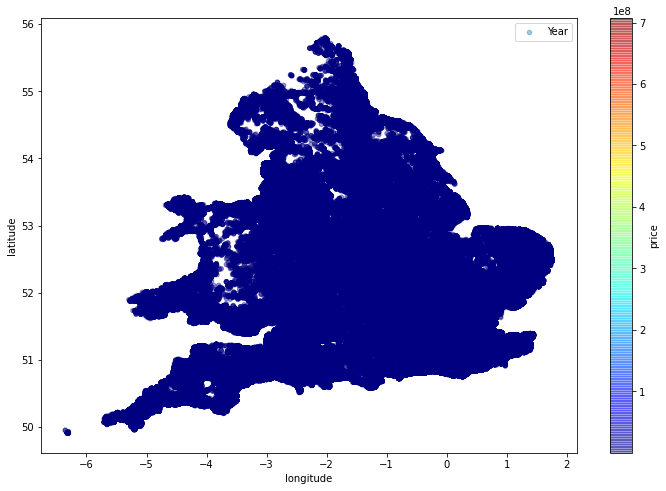

In [ ]:
_= merge_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=merge_data["Year"]/100, label="Year", figsize=(12,8),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#Looks like southern part of UK

Text(0.5, 1.0, 'Boxplot showing distribution of houses sold per month')

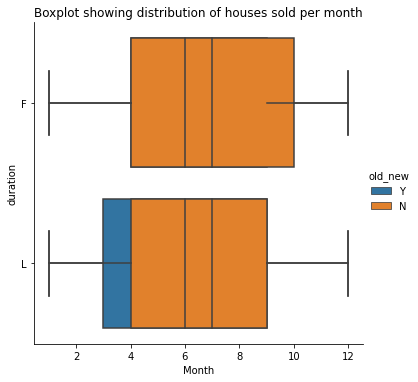

In [ ]:
_=sns.catplot(x="Month", y="duration", hue="old_new",
            kind="box", dodge=False, data=merge_data)
plt.title('Boxplot showing distribution of houses sold per month')

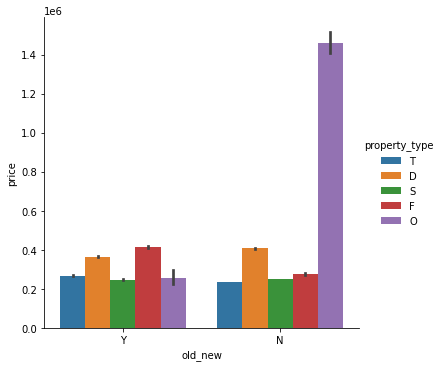

In [ ]:
sns.catplot(x="old_new", y="price", hue="property_type", kind="bar", data = merge_data)

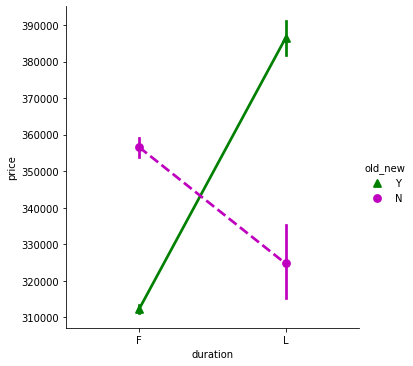

In [ ]:
sns.catplot(x="duration", y="price", hue="old_new",
            palette={"Y": "g", "N": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=merge_data)

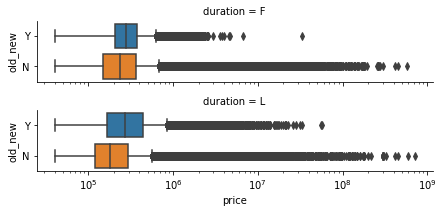

In [ ]:
ax = sns.catplot(x="price", y="old_new", row="duration",
                kind="box", orient="h", height=1.5, aspect=4,
                data=merge_data.query("price > 0"))
ax.set(xscale="log")
plt.show()

In [ ]:
#Correlation between Price as other features
corr_matrix = merge_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
total_floor_area                  0.118306
epc_lighting_cost_current         0.093018
number_of_rooms                   0.085239
epc_heating_cost_current          0.077849
crimesin3km_antisocial            0.077217
epc_flat_storey_count             0.064059
epc_number_open_fireplaces        0.046170
longitude                         0.042253
address_id                        0.027497
epc_floor_height                  0.022395
epc_hot_water_cost_current        0.019835
closestschool                     0.013739
epc_energy_consumption_current    0.009114
Day                               0.001769
Year                              0.000550
Month                             0.000450
closeststop                      -0.001413
closestpark                      -0.007912
distance_center                  -0.016562
latitude                         -0.049333
Name: price, dtype: float64